In [1]:
import sys, os
import pytesseract
import copy
import string
import pickle
import cv2
import numpy as np
sys.path.append('/Users/yunsu/mysite-projects/selenium')
from matplotlib import pyplot as plt
from W2_ocr import *
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [2]:
with open('w2_list.pk1', 'rb') as f:
    dataset = pickle.load(f)

In [3]:
w2_dic, w2_list, page = dataset

In [4]:
w2_dic

{'1': '1 Wages, Tips and other',
 '10': '10 Dependent Care Benefits',
 '11': '11 Nonqualified plans',
 '12': '12 See Instructions for box 12',
 '14': '14 See Instructions for box 14',
 '15': '15 State',
 '16': '16 State Wages,',
 '17': '17 State Income',
 '18': '18 Local Wages, Tips and',
 '19': '19 Local Income',
 '2': '2 Federal Income Tax withheld',
 '20': '20 Locality',
 '3': '3 Social Security Wages',
 '4': '4 Social Security Tax withheld',
 '5': '5 Medicare Wages and Tips',
 '6': '6 Medicare Tax withheld',
 '7': '7 Social Security Tips',
 '8': '8 Allocated Tips',
 'Em': 'Employer’s State ID Number',
 'OM': 'OMB No. 1545-0008 This information is being furnished to the Internet Revenue Service. if you are required to ﬁle',
 'Re': 'Retirement Plan: Yes',
 'St': 'Statutory Employee: No',
 'Th': 'Third-party sick pay: No',
 'a': 'a. Employee’s Social Security Number',
 'b': 'b. Employer‘s Identification Number',
 'c': 'c. Employer‘s Name, Address, and ZIP Code',
 'd': 'd. Control Numb

In [5]:
w2_list

[['a', 'employee', 'social', 'security', 'number'],
 ['omb', 'no'],
 ['b', 'employer', 'identification'],
 ['d', 'control', 'number'],
 ['1', 'wages,', 'tips', 'compensation'],
 ['2', 'federal', 'income', 'tax'],
 ['c', 'employer', 'name,', 'address,', 'and', 'zip'],
 ['3', 'social', 'security', 'wages'],
 ['4', 'social', 'security', 'tax'],
 ['5', 'medicare', 'wages', 'tips'],
 ['6', 'medicare', 'tax'],
 ['7', 'social', 'security', 'tips'],
 ['8', 'allocated', 'tips'],
 ['e', 'employee', 'name,', 'address,', 'and', 'zip'],
 ['10', 'dependent', 'care', 'benefits'],
 ['12', 'see', 'instructions', 'for', 'box', '12'],
 ['14', 'see', 'instructions', 'for', 'box', '14'],
 ['statutory', 'employee'],
 ['retirement', 'plan'],
 ['third-party', 'sick', 'pay'],
 ['15', 'state'],
 ['employer', 'state', 'id', 'number'],
 ['16', 'state', 'wages,', 'tips', 'and', 'etc'],
 ['17', 'state', 'income', 'tax'],
 ['18', 'local', 'wages,', 'tips', 'and', 'etc'],
 ['19', 'local', 'income', 'tax'],
 ['20', 'l

In [6]:
url = '/Users/yunsu/desktop/python_ocr/boseok.png'
url2 = '/Users/yunsu/desktop/python_ocr/Target_test.png'
url3 = '/Users/yunsu/desktop/python_ocr/test.png'

In [7]:
img_list = pre_process(url)

In [9]:
img = Image.open(url3)

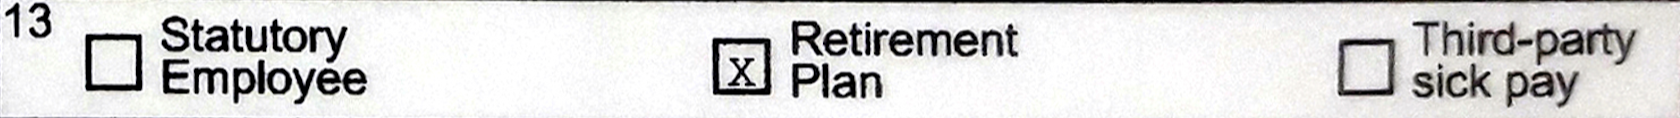

In [10]:
img

In [16]:
def solve_13box(img, show=False):
    src = np.array(img)
    if img.mode != 'L':
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        gray = src
    img = Image.fromarray(gray)
    joints, mask, line_wit, v_size2, h_final, v_final = find_box_joints(img)
    one_line = make_points_list(joints=joints, line_wit=line_wit, v_size2=v_size2)
    points = align_small_box_points(one_line=one_line, joints=joints)
    if show == True:
        box = make_box(points, joints, v_size2, line_wit)    
        show_box(box=box, mask=mask)
    c_points = give_conditions(points=points, mask=mask, v_size2=v_size2, line_wit=line_wit)
    is_st, is_bot, is_end, is_right = classify_points(c_points=c_points, joints=joints, v_size2=v_size2, 
                                                      line_wit=line_wit, mask=mask, points=points)
    st, end = cut_points(joints=joints, is_st=is_st, is_bot=is_bot, is_end=is_end, is_right=is_right)
    fix_st_0 = fix_st_vertical(h_final, st=st)
    fix_st_1 = fix_st_horizontal(v_final, st=st)
    st = fix_st(st, fix_st_0=fix_st_0, fix_st_1=fix_st_1)

    img = Image.fromarray(gray)
    img_list = make_crack(ful_img=img, st=st, end=end)
    choice = ['Statutory Employee', 'Retirement Plan', 'Third-party sick pay']
    result = []
    for idx, image in enumerate(img_list):
        gr = np.array(image)
        ret, thresh = cv2.threshold(gr, 70 ,255, cv2.THRESH_BINARY_INV)
        print(np.sum(thresh)/thresh.size)
        if np.sum(thresh)/thresh.size > 5:
            result.append("{}\nY".format(choice[idx]))
        else:
            result.append("{}\nN".format(choice[idx]))
    return result

In [23]:
solve_13box(img)

0.0
31.1337209302
0.0


['Statutory Employee: No', 'Retirement Plan: Yes', 'Third-party sick pay: No']

In [30]:
img = img_list[18]

In [20]:
src = np.array(img)
if img.mode != 'L':
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
else:
    gray = src
img = Image.fromarray(gray)
joints, mask, line_wit, v_size2, h_final, v_final = find_box_joints(img)
one_line = make_points_list(joints=joints, line_wit=line_wit, v_size2=v_size2)
points = align_small_box_points(one_line=one_line, joints=joints)
box = make_box(points, joints, v_size2, line_wit)    
show_box(box=box, mask=mask)
c_points = give_conditions(points=points, mask=mask, v_size2=v_size2, line_wit=line_wit)
is_st, is_bot, is_end, is_right = classify_points(c_points=c_points, joints=joints, v_size2=v_size2, 
                                                  line_wit=line_wit, mask=mask, points=points)
st, end = cut_points(joints=joints, is_st=is_st, is_bot=is_bot, is_end=is_end, is_right=is_right)
fix_st_0 = fix_st_vertical(h_final, st=st)
fix_st_1 = fix_st_horizontal(v_final, st=st)
st = fix_st(st, fix_st_0=fix_st_0, fix_st_1=fix_st_1)

img = Image.fromarray(gray)
img_list = make_crack(ful_img=img, st=st, end=end)
choice = ['Statutory Employee', 'Retirement Plan', 'Third-party sick pay']
result = []
for idx, image in enumerate(img_list):
    gr = np.array(image)
    ret, thresh = cv2.threshold(gr, 70 ,255, cv2.THRESH_BINARY_INV)
    print(np.sum(thresh)/thresh.size)
    if np.sum(thresh)/thresh.size > 5:
        result.append("{}\nYes".format(choice[idx]))
    else:
        result.append("{}\nNo".format(choice[idx]))

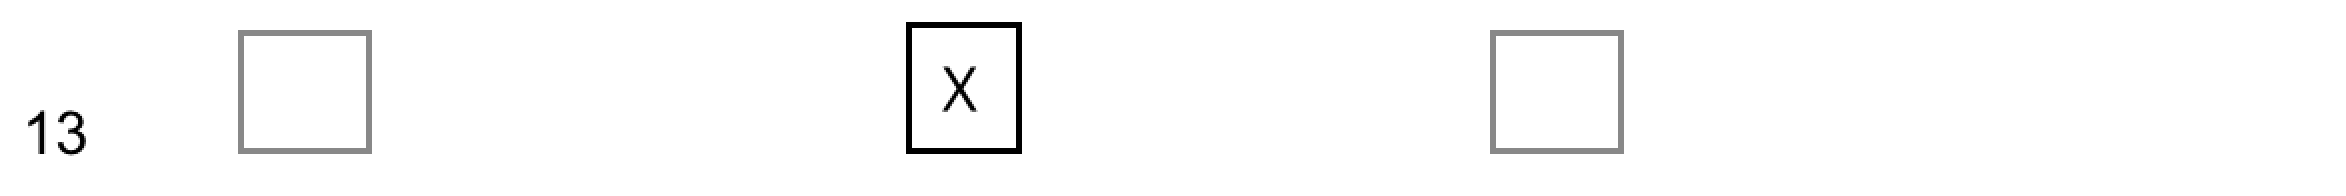

In [49]:
img_list[18]

In [17]:
img_list = pre_process(url)
# ocr Process
page = []
if len(pytesseract.image_to_string(img_list[0])) >= 3:
    #그렇다면 2016버전입니다. 
    print("version for 2016")
    for idx, img in enumerate(img_list):
        if idx != 18:
            page.append(pytesseract.image_to_string(img))
        elif idx == 18:
            solved_box = solve_13box(img_list[18])
            # 리스트를 풀어서 각각 넣기.
            for data in solved_box:
                page.append(data)
else:
    # 그렇다면 2014 버전입니다.
    print('version for 2014')
    for img in img_list:
        page.append(pytesseract.image_to_string(img))
page

version for 2014


['',
 "a Employee's social security number\n\n308-27-4383",
 'OMB No. 1545-0008',
 'b Employer identiﬁcation number\n\n13-5565207',
 '1 Wages, tips, other compensation\n\n76579.31',
 '2 Federal income tax withheld\n\n14438.62',
 "c Employer's name. address. and ZIP code\n\nKPMG LLP #2381212\n717 N. Harwood Street Suite 3100\nDallas, TX 75201-6585",
 '3 Social security wages\n\n76579.31',
 '4 Social security tax withheld\n\n4747.92',
 '5 Medicare wages and tips\n\n76579.31',
 '6 Medicare tax withheld\n1 1 10.40',
 '7 Social security tips',
 '8 Allocated tips',
 'd Control number',
 '',
 '1O Dependent care beneﬁts',
 'e Employee‘s ﬁrst name and initial Last name Sufi.\n\nBOSEOK IN\n\n255 S Grand Ave Apt 610\nLos Angeles, CA 90012\n\nf Employee‘s address and ZIP code',
 '11 Nonqualiﬁed plans',
 '12a See instructions for box 12\n\nDD | 4583.52',
 '13 Statutory\nemployee',
 'Retirement\nplan\n\nX',
 'Third-party\nsick pay',
 '12b',
 '12c',
 '14 Other\nCASDI 765.79',
 '12d',
 '',
 '15 State 